# Question 1: (1 pt)
Noise in digital images can be typically identified as:

     Sharp boundaries between objects (+)
     Gradual changes in pixel intensity
     Random changes in pixel intensity
     Darker background

# Question 2: (1 pt)
Image denoising techniques discussed in the class attempt to fix noisy pixels using

     Their neighboring pixels (+)
     Average image background color
     Average image foreground color
     Number of pixels in the image

# Question 3: (3 pts)
If all coefficients α in multi-scale synthesis are set to 1, the resulting “enhanced” image Q will be:

     More detailed (“sharper”) than the original image
     More blurred (“smoother”) than the original image
     Darker than the original image
     The same as the original image (+)

# Question 4: (2 pt) In function
Split(X)
explained in the class, which of the two output images (L, D) has width and height equal to one half of the original width/height of X?

     Low frequency image (+)
     High frequency image
     Both
     Neither

# Question 5: (2 pts) In function
Split(X)
explained in the class, output image D is also known as

     High-frequency image (+)
     Low-frequency image
     Noisy image
     Original image



# Question 6: (2 pts)
Multiscale image enhancement explained in the class was used to

    A. Make images brighter
    B. Make images larger
    C. Make images smoother and softer
    D. Make image details more visible (+)

Solve problems
Now let’s run some filtering code, using the algorithms we discussed in the class. To keep things simple and window/level free, we will use the classical 8-bit “Portrait” image, so that you can see everything at once. However, please feel free to experiment with more complex DICOM images I provided.

# Question 7: (4 pts)
Using image loading code provided below, load “Portrait” image, adding noise with dNoise=60.
Then run a simple averaging filter presented in the class (see ImageFilter(Img, r)function) with filter radius r=5. Which of the following fragments corresponds to the filtered result?

     Image A
     Image B
     Image C
     Image D(+)

In [7]:
from PIL import Image
import pydicom
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def LoadImage(nImg=1,dNoise=0, vmin=-1, vmax=1):
    if nImg == 1:
        Img = Image.open('datasets/Data/Portrait.bmp')
    elif nImg == 2:
        Img = pydicom.dcmread('datasets/Data/Large_Skull')
    else:
        Img = pydicom.dcmread('datasets/Data/test_CT')
    
    Img = np.array(Img)
    Img = Img.astype(float)

    if dNoise > 0:
        Img = Img + np.random.uniform(-dNoise, dNoise, Img.shape)

    plt.figure('Loaded')
    if vmin>vmax:
        plt.imshow(Img, cmap=plt.cm.bone, vmin=vmin, vmax=vmax)
    else:
        plt.imshow(Img, cmap=plt.cm.bone)

    return Img


In [17]:
def ImageFilter(Img, r):
    Img = Img.astype(float)
    nRows, nCols = np.shape(Img)

    Filtered = Img.copy()

    bDetailedButLonger = True
    for nr in range(r+1, nRows-r-2):
        for nc in range(r+1, nCols-r-2):
            if bDetailedButLonger:
                sumPixels = 0; numPixels = 0;
                for x in range(nr-r, nr+r+1):
                    for y in range(nc-r, nc+r+1):
                        sumPixels = sumPixels + Img[x][y]
                        numPixels = numPixels + 1
                
                Filtered[nr][nc] = sumPixels / numPixels
        else:
            Filtered[nr][nc] = np.mean(Img[nr-r:nr+r, nc-r:nc+r])
    
    f, axarr = plt.subplots(2)
    axarr[0].imshow(Img, cmap=plt.cm.bone)
    axarr[1].imshow(Filtered, cmap=plt.cm.bone)

    return Filtered

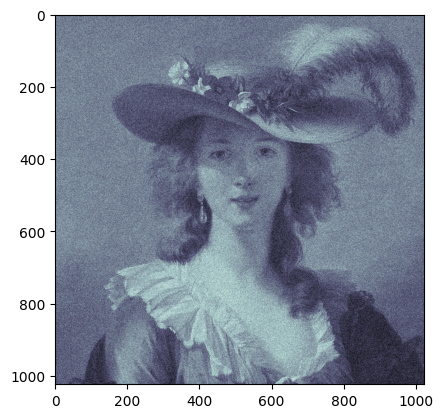

In [34]:
img = LoadImage(dNoise=60)

In [23]:
res = ImageFilter(img, 15)

KeyboardInterrupt: 

# Question 8: (3 pts)
In the experiment described in the previous question, which filter radius results in more blur in the
filtered image? 

    1
    5
     15
     20 (+)
     All will produce the same amount of blur



# Question 9: (5 pts)
Using Split and Merge functions, apply multiscale enhancement to the Portrait image, multiplying images D1 (first level), D2 (second), D3 (third) by alpha1, alpha2, alpha3 coefficients respectively, to improve image details. Which of the following alpha coefficient values produce a more detailed, sharper-looking image?

     alpha1 = 1.5;
     alpha1 = 1.5;
     alpha1 = 0.5;
     alpha1 = 1.5;

Hint:
alpha2 = 1.5; alpha2 = 1.5; alpha2 = 0.5; alpha2 = 1.5;
alpha3 = 1.1 alpha3 = -1.1 alpha3 = 0.1 alpha3 = 2.1
The enhanced image should look as shown below: you can clearly see better, sharper detail around the “high frequency” areas.

In [ ]:
def Split(X):
    nRows, nCols = np.shape(X)

    nRows2 = nRows//2
    nCols2 = nCols//2
    L = np.zeros((nRows2, nCols2))
    D = np.zeros((nRows,nCols))
    for nr2 in range(nRows2):
        nr = 2*nr2
        for nc2 in range(nCols2):
            nc = 2*nc2
            avg = np.mean(X[nr:nr+1, nc:nc+1])
            L[nr2,nc2] = avg
            D[nr,nc] = X[nr,nc] - avg
            D[nr+1,nc] = X[nr+1,nc] - avg
            D[nr,nc+1] = X[nr, nc+1] - avg
            D[nr+1,nc+1] = X[nr+1, nc+1] - avg
        
    return (L,D)

def Merge(L,D, a):
    X = D.copy()

    nRows, nCols = np.shape(X)
    for nr in range(nRows-1):
        nr2 = nr//2
        for nc in range(nCols-1):
            nc2 = nc//2
            X[nr, nc] = a * X[nr, nc] + L[nr2, nc2]
    X = np.minimum(np.maximum(X,0), 255)
    return X

1.5 1.5 1.1


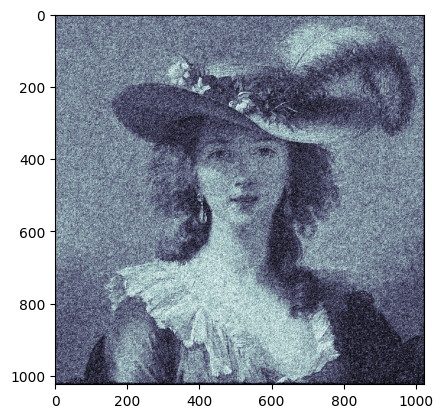

1.5 1.5 -1.1


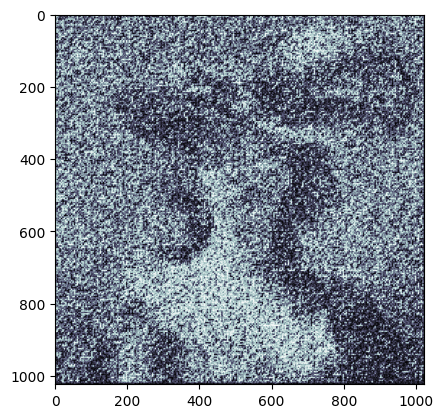

0.5 0.5 0.1


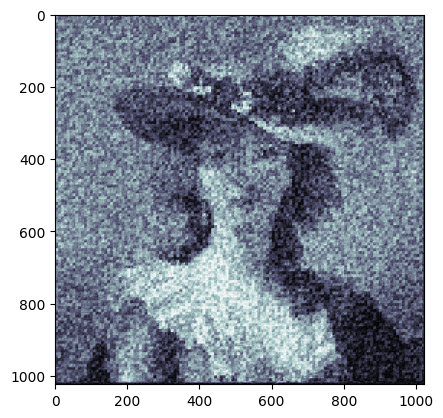

1.5 1.5 2.1


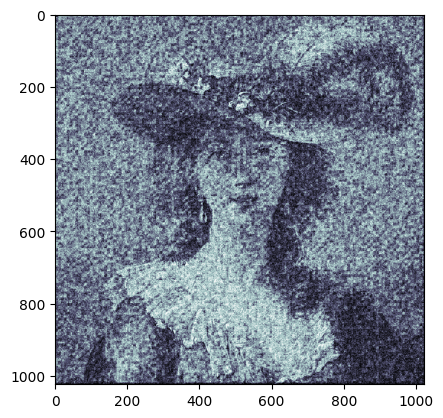

In [33]:
a = [(1.5,1.5,1.1), (1.5,1.5,-1.1), (0.5,0.5,0.1), (1.5,1.5,2.1)]
for a1,a2,a3 in a:
    G, D1 = Split(img)
    G, D2 = Split(G)
    G, D3 = Split(G)
    G = Merge(G, D3, a3)
    G = Merge(G, D2, a2)
    G = Merge(G, D1, a1)
    print(a1,a2,a3)
    plt.imshow(G, plt.cm.bone)
    plt.show()

